In [201]:
#Assignment Decision Tree

In [202]:
import pandas as pd

In [203]:
dataset=pd.read_csv("insurance_pre.csv")

In [204]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [205]:
dataset=pd.get_dummies(dataset,dtype=float,drop_first=True)

In [206]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1.0,0.0
1334,18,31.920,0,2205.98080,0.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0


In [207]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [208]:
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]

In [209]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0.0,1.0
1,18,33.770,1,1.0,0.0
2,28,33.000,3,1.0,0.0
3,33,22.705,0,1.0,0.0
4,32,28.880,0,1.0,0.0
...,...,...,...,...,...
1333,50,30.970,3,1.0,0.0
1334,18,31.920,0,0.0,0.0
1335,18,36.850,0,0.0,0.0
1336,21,25.800,0,0.0,0.0


In [210]:
dependent=dataset[['charges']]

In [211]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X_train,X_test,Y_train,Y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [214]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [215]:
X_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [216]:

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
regressor=regressor.fit(X_train,Y_train)

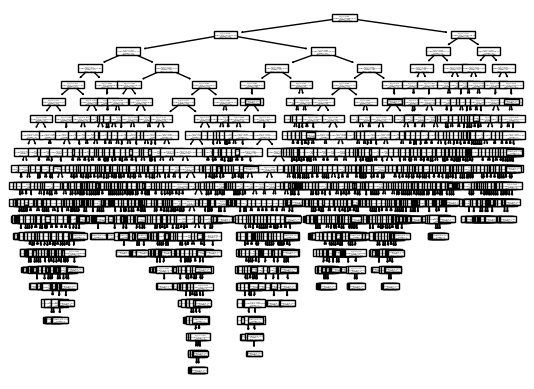

In [217]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [218]:
Y_pred = regressor .predict (X_test)

In [219]:
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,Y_pred)

In [220]:
r_score

0.6955380260364286